In [1]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset
spam_data = pd.read_csv('data/spam_ham_dataset.csv')

In [3]:
spam_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
# Steps 
# 1. Data Cleaning
# 2. EDA
# 3. Text Pre-processing
# 4. Model Building
# 5. Evaluating
# 6. Improving model


## 1. Data Cleaning 

In [5]:
spam_data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
# Check for null values
spam_data.info()
spam_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [7]:
# Drop second and the last column
spam_data.drop(columns=['Unnamed: 0', 'label_num'], inplace = True)

In [8]:
spam_data

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [9]:
# Rename columns and make them self-explanatory
spam_data = spam_data.rename(columns = {'label':'target', 'text' :'message'})

In [10]:
spam_data

,target,message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [11]:
# Use label encoder to change target text values into numeric
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(spam_data['target'])

array([0, 0, 0, ..., 0, 0, 1])

In [12]:
spam_data['target'] = encoder.fit_transform(spam_data['target'])
spam_data

,target,message
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,0,Subject: put the 10 on the ft\r\nthe transport...
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,0,Subject: calpine daily gas nomination\r\n>\r\n...
5169,0,Subject: industrial worksheets for august 2000...


In [13]:
# Check for duplicate values
spam_data.duplicated().sum()

178

In [14]:
# Remove the duplicate values
spam_data = spam_data.drop_duplicates(keep ='first') # Keeps the first value and removes the duplicates

In [15]:
# Check for duplicate 
spam_data.duplicated().sum()

0

In [16]:
spam_data.shape

(4993, 2)

## Exploratory Data Analysis

In [17]:
# Check value counts
spam_data['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

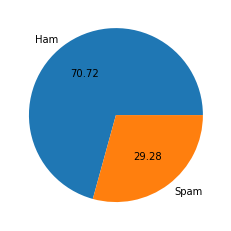

In [18]:
# Plot the data in matplotlib
plt.pie(spam_data['target'].value_counts(), labels = ['Ham', 'Spam'],autopct= '%0.2f')
plt.show()

In [19]:
# Slight difference in data

In [20]:
# Futher analysis using nltk 
!pip install nltk;

In [21]:
import nltk

In [22]:
nltk.download('punkt') # For NLTK dependencies

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pneuma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# Check the length of each message and create a new column
spam_data['message'].apply(len)
spam_data['num_characters'] = spam_data['message'].apply(len)

C:\Users\Pneuma\AppData\Local\Temp/ipykernel_748/3109159875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['num_characters'] = spam_data['message'].apply(len)


In [24]:
spam_data

,target,message,num_characters
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336
...,...,...,...
5165,0,"Subject: fw : crosstex energy , driscoll ranch...",869
5166,0,Subject: put the 10 on the ft\r\nthe transport...,534
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114
5169,0,Subject: industrial worksheets for august 2000...,573


In [25]:
# Extract the number of words in the messages using nltk tokenizer
spam_data["message"].apply(lambda x: nltk.word_tokenize(x))

0       [Subject, :, enron, methanol, ;, meter, #, :, ...
1       [Subject, :, hpl, nom, for, january, 9, ,, 200...
2       [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3       [Subject, :, photoshop, ,, windows, ,, office,...
4       [Subject, :, re, :, indian, springs, this, dea...
                              ...                        
5165    [Subject, :, fw, :, crosstex, energy, ,, drisc...
5166    [Subject, :, put, the, 10, on, the, ft, the, t...
5167    [Subject, :, 3, /, 4, /, 2000, and, following,...
5169    [Subject, :, industrial, worksheets, for, augu...
5170    [Subject, :, important, online, banking, alert...
Name: message, Length: 4993, dtype: object

In [26]:
# Count the words and add a new column to the DataFrame
spam_data['word_count'] = spam_data['message'].apply(lambda x: len(nltk.word_tokenize(x)))
spam_data

C:\Users\Pneuma\AppData\Local\Temp/ipykernel_748/3170460018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['word_count'] = spam_data['message'].apply(lambda x: len(nltk.word_tokenize(x)))


,target,message,num_characters,word_count
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71
...,...,...,...,...
5165,0,"Subject: fw : crosstex energy , driscoll ranch...",869,197
5166,0,Subject: put the 10 on the ft\r\nthe transport...,534,156
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114,306
5169,0,Subject: industrial worksheets for august 2000...,573,112


In [29]:
spam_data

,target,message,num_characters,word_count
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71
...,...,...,...,...
5165,0,"Subject: fw : crosstex energy , driscoll ranch...",869,197
5166,0,Subject: put the 10 on the ft\r\nthe transport...,534,156
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114,306
5169,0,Subject: industrial worksheets for august 2000...,573,112


In [30]:
# Tokenize data based on sentence
spam_data['sent_count'] = spam_data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Pneuma\AppData\Local\Temp/ipykernel_748/3300578500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['sent_count'] = spam_data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [31]:
spam_data.sample(5)

,target,message,num_characters,word_count,sent_count
4179,0,Subject: potential list for november\r\ndaren ...,536,107,4
1948,0,Subject: nomination - eastrans - - 4 / 4 and 4...,683,162,3
780,1,"Subject: but it ' s not interesting\r\nwed , 0...",322,73,7
3597,0,"Subject: enron / hpl actuals for january 17 , ...",77,18,2
1957,0,Subject: physical curve mappings _ sitara\r\nh...,609,128,7


In [32]:
# describe the dataframe
spam_data[['num_characters','word_count', 'sent_count']].describe()

,num_characters,word_count,sent_count
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,10.202884
std,1547.863387,340.702932,22.003030
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,3.000000
50%,557.000000,125.000000,6.000000
75%,1262.000000,288.000000,12.000000
max,32258.000000,8863.000000,1163.000000


In [33]:
#Describe ham and spam messages
# Ham Message
spam_data[spam_data['target']== 0][['num_characters','word_count', 'sent_count']].describe()

,num_characters,word_count,sent_count
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,8.804871
std,1402.785831,337.018933,22.303918
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,3.000000
50%,538.000000,128.000000,5.000000
75%,1253.500000,298.500000,10.000000
max,32258.000000,8863.000000,1163.000000


In [34]:
# Describe for spam messages
spam_data[spam_data['target']==1][['num_characters','word_count', 'sent_count']].describe()

,num_characters,word_count,sent_count
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,13.579343
std,1840.112883,349.439381,20.883535
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,3.000000
50%,589.000000,119.500000,8.000000
75%,1305.000000,252.750000,15.000000
max,22073.000000,3963.000000,331.000000


In [35]:
# Plot the data in histogram
!pip install seaborn


In [36]:
import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

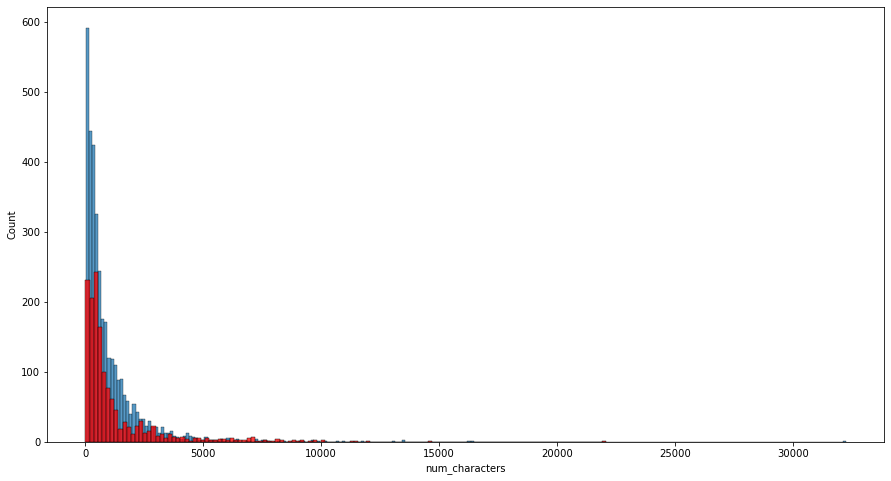

In [37]:
#Based on characters
plt.figure(figsize = (15,8))
sns.histplot(spam_data[spam_data['target']==0]['num_characters'])
sns.histplot(spam_data[spam_data['target']==1]['num_characters'], color = 'red')

<AxesSubplot:xlabel='sent_count', ylabel='Count'>

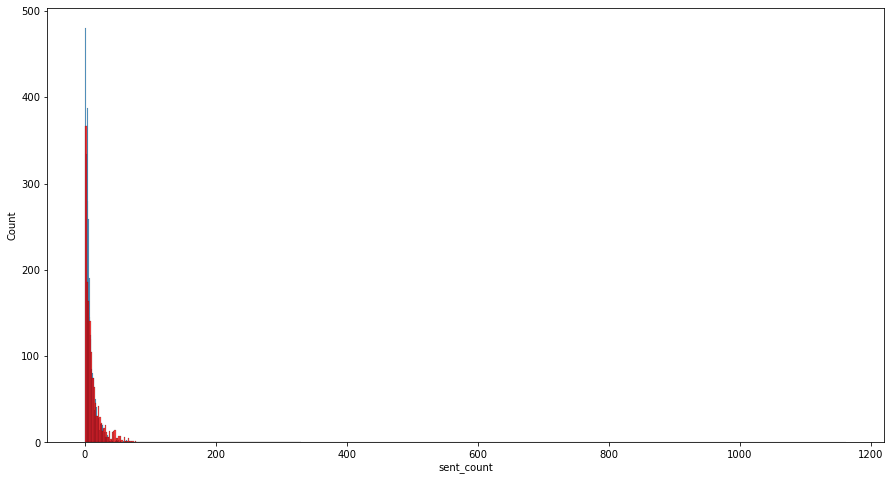

In [38]:
# Based on word count
plt.figure(figsize = (15,8))
sns.histplot(spam_data[spam_data['target']==0]['sent_count'])
sns.histplot(spam_data[spam_data['target']==1]['sent_count'], color = 'red')

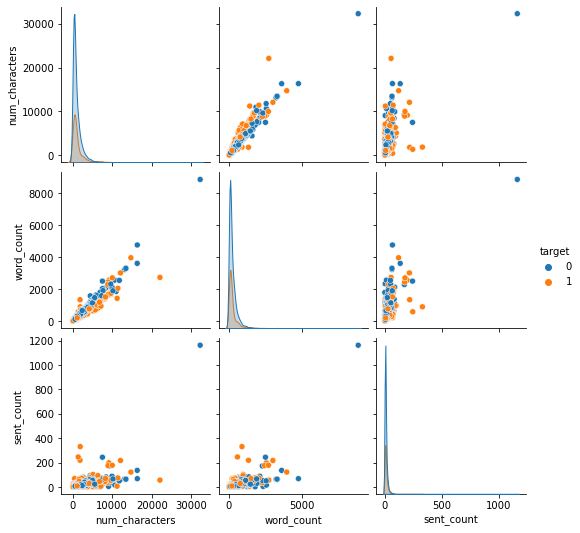

In [39]:
# Pairplot
sns.pairplot(spam_data, hue = 'target')

<AxesSubplot:>

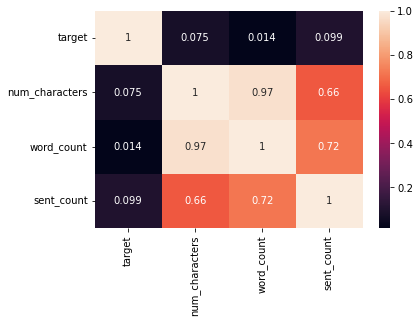

In [40]:
# Check correlation
sns.heatmap(spam_data.corr(), annot= True)

## 3. Data Pre-processing
    1. Tokenization
    2. Lower case
    3. Removing special Characters, Stop words and punctuation
    4. Stemming (lemma)

In [41]:
# 4. Stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Hello Loving')

# What are Stopwords?

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

#Strings
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pneuma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
# Create a fuction to lower the text
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    
    #Remove the alpha NUmeric values from messages
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    

    # Remove the stopwords and punctuations
    message = y[:]  #Cloning the y list
    y.clear()
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation: # Removes the punctuations 
                                                                                #and stopwords from text
            y.append(i)
    
    # Stemming 
    
    message = y[:]
    y.clear()
    for i in message:
        y.append(ps.stem(i))
        
        
    return " " .join(y)

In [43]:
spam_data['message'].apply(transform_message) 

0       subject enron methanol meter 988291 follow not...
1       subject hpl nom januari 9 2001 see attach file...
2       subject neon retreat ho ho ho around wonder ti...
3       subject photoshop window offic cheap main tren...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5165    subject fw crosstex energi driscol ranch 1 3 m...
5166    subject put 10 ft transport volum decreas 2500...
5167    subject 3 4 2000 follow nom hpl take extra 15 ...
5169    subject industri worksheet august 2000 activ a...
5170    subject import onlin bank alert dear valu citi...
Name: message, Length: 4993, dtype: object

In [44]:
spam_data['transformed_data'] = spam_data['message'].apply(transform_message) 

C:\Users\Pneuma\AppData\Local\Temp/ipykernel_748/3783895519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['transformed_data'] = spam_data['message'].apply(transform_message)


In [45]:
spam_data

,target,message,num_characters,word_count,sent_count,transformed_data
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,1,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...
...,...,...,...,...,...,...
5165,0,"Subject: fw : crosstex energy , driscoll ranch...",869,197,7,subject fw crosstex energi driscol ranch 1 3 m...
5166,0,Subject: put the 10 on the ft\r\nthe transport...,534,156,3,subject put 10 ft transport volum decreas 2500...
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114,306,8,subject 3 4 2000 follow nom hpl take extra 15 ...
5169,0,Subject: industrial worksheets for august 2000...,573,112,7,subject industri worksheet august 2000 activ a...


## 4. Model Building
    1. Vectorization of the Text data
    2. Building model
    3. Training and testing data

In [46]:
# Vectorization using Bag of words and TfidfVectorizor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [47]:
X = tf.fit_transform(spam_data['transformed_data']).toarray()

In [48]:
X.shape

(4993, 42592)

In [49]:
y = spam_data['target'].values

In [50]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [51]:
#Split the data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2, random_state = 2)

In [52]:
#We will try different models and train them to obtain better results
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
# Fit the data in the GaussianNB model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GaussianNB Model: ")
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

GaussianNB Model: 
0.9409409409409409
[[669  28]
 [ 31 271]]
0.9063545150501672


In [60]:
#Fit the data in MultinomialNB and test

mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print("MultimonialNB Model: ")
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

MultimonialNB Model: 
0.908908908908909
[[696   1]
 [ 90 212]]
0.9953051643192489


In [62]:
# Fit the data in the BernoulliNB model
bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_test)
print("BernoulliNB model: ")
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

BernoulliNB model: 
0.8468468468468469
[[677  20]
 [133 169]]
0.8941798941798942


#### Tfidf with MultinomialNB produced the best results
#### In imbalanced data, precision matters more than accuracy

In [63]:
#Extract the model using pickle
import pickle
pickle.dump(mnb, open("model.pkl", 'wb'))

In [64]:
pickle.dump(tf, open("Vectorizer.pkl", 'wb'))